In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('cleanedData.csv')
df['courses'] = df[['code_module', 'code_presentation']].apply('-'.join, axis=1)
df = df.replace(' ', '_', regex=True)

# keep only relevant columns in our dataset
df = df[['courses', 'id_student','gender','region', 'highest_education', 'age_band', 'studied_credits', 'final_result']]
df = df[df.final_result != 'Withdrawn']
df = df[df.final_result != 'Distinction']

In [3]:
features = ['courses', 'id_student','gender','region', 'highest_education', 'age_band', 'studied_credits']

In [4]:
df = pd.get_dummies(df, columns=features)

In [5]:
y = df['final_result']
X = df.drop(['final_result'], axis = 1)
print('Final Result Distribution:')
print(y.value_counts())

Final Result Distribution:
Pass    12361
Fail     7052
Name: final_result, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=44)
rf = RandomForestClassifier(n_estimators=100, random_state=44)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13589, 18528) (5824, 18528) (13589,) (5824,)


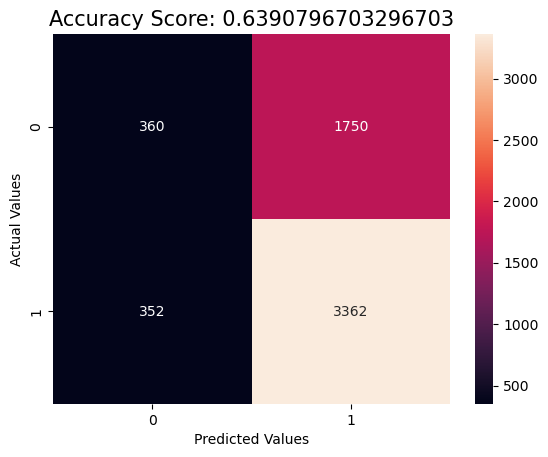

In [8]:
score = rf.score(X_test,y_test)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()